<h1><center><font size="25">Introducción a grafos y redes con Python</font></center></h1>

<center><b>Fernando Carazo</b></center>

<center><i>Enero, 2023</i></center>

## Introducción

Una de las últimas tendencias en el campo de la inteligencia artificial es *Graph Machine Learning*. Esta rama del machine learning se centra en aplicar algoritmos de analítica avanzada al estudio de redes o grafos.

Los grafos son estructuras de datos compuesta por nodos y enlaces que se utilizan para representar relaciones entre objetos. Si utilizamos el ejemplo de una red social, los nodos representarían a los usuarios y los enlaces la amistad o seguimiento entre los usuarios de dicha red social. Utilizando el Graph Machine Learning podremos realizar tareas como detectar los usuarios más populares, predecir futuras amistades o detectar comunidades de amigos con intereses parecidos.

En esta serie de artículos aprenderemos las bases del Graph Machine Learning y resolveremos problemas utilizando las librerías de grafos más importantes de Python como [NetworkX](https://networkx.org/) [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/), [Stellargraph](https://stellargraph.readthedocs.io/en/v0.8.3/quickstart.html) o [Graph Neural Networks](https://en.wikipedia.org/wiki/Graph_neural_network) (GNNs).

<p align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Internet_map_1024.jpg" style="width: 400px"></p>

<center><font size='2.5'>
<i>Figura 1. Mapa parcial de Internet basado en la información obtenida del sitio opte.org el 15 de enero de 2005. Cada linea dibujada entre dos nodos representa el enlace entre dos direcciones IP. La longitud de las líneas es proporcional al tiempo de espera entre los nodos. La imagen representa 30% de las redes accesibles en el año 2005.</i>
</font></center>


## Tipos de Grafos

Los grafos se desriben por sus nodos y los enlaces entre dichos nodos. El número total de nodos de un grafo se representa con la letra *N* y el número de links con la *L*. Existen varios tipos de grafos en relación al tipo de relación que existe entre sus nodos, cada uno de ellos permite modelar distintas problemas:

- **Grafos no dirigidos**: los enlaces no tienen dirección, es decir, si un nodo A está conectado a un nodo B, entonces B también está conectado a A. Un ejemplo de un grafo no dirigido podría ser una red social donde los usuarios están conectados entre sí a través de amistad.

- **Grafos dirigidos**: los enlaces tienen una dirección, es decir, si un nodo A está conectado a un nodo B, no necesariamente B estará conectado a A. Un ejemplo de un grafo dirigido podría ser una red de seguimiento en una red social, donde un usuario sigue a otro pero no necesariamente es seguido de vuelta.

- **Grafos ponderados**: los enlaces tienen un peso asociado, que representa la importancia o la intensidad de la relación entre los nodos. Un ejemplo de un grafo ponderado podría ser una red de ciudades donde los enlaces representan las rutas de transporte y el peso representa la distancia entre dos ciudades.

<p align="center"><img src="../docs/img/08_grafo-ciudades.png" style="width: 400px"></p>

<center><font size='2.5'>
<i>Figura 3. Ejemplo de un grafo ponderado.</i>
</font></center>

- **Grafos bipartitos**: los nodos se dividen en dos conjuntos disjuntos, y solo se permiten enlaces entre nodos de diferentes conjuntos. Un ejemplo de grafo bipartito podría ser una red de películas y actores, donde los nodos de un conjunto son las películas y los nodos del otro conjunto son los actores, y solo se permiten enlaces entre películas y actores (ya que un actor solo puede actuar en una película).


## Matriz de adyacencia

Para analizar un grafo es neceario representarlo de forma matemática. Existen dos formas principales de: la lista de adyacencia y la matriz de adyacencia. La lista de adyacencia simplemente es una lista en la que se indican todas las conexiones. Por ejemplo, si tenemos un grafo dirigido con tres nodos {A, B y C}, donde A se conecta con B y C, tendremos la lista de adyacencia {(A,B), (A,C)}. Si el grafo es no dirigido, la lista debe incluir las conexiones en ambas direcciones {(A,B), (B,A) (A,C), (C,A)}.

Otra forma de representar un grafo es mediante lo que se conoce como matriz de adyacencia. La matriz de adyacencia es una matriz de dimensión NxN, siendo N el número de nodos y donde aparece un 0 si la conexión entre un par de nodos no existe y un 1 si sí que existe. Para grafos ponderados, en vez de un 1, la matriz presentará el valor del peso de la conexión. Debido a sus propiedades matemáticas, la matriz de adyacencia es el método de representación de grafos más utilizado. 

La desventaja de la matriz de adyacencia, es que para grafos muy grandes, puede ocupar mucho espacio. Por este motivo, para grafos grandes se utiliza la *matriz de adyacencia sparse*, que internamente únicamente almacena la información de las conexiones existentes.

Para grafos no dirigidos la matriz de adyacencia es simétrica, ya que si existe la conexión entre los nodos A y B, también existirá la conexión recíproca.

<p align="center"><img src="https://github.com/fcarazo/network-science/blob/master/docs/img/05_adjacency_matrix.jpg?raw=true" style="width: 400px"></p>

<center><font size='2.5'>
<i>Figura 3. Ejemplo de un grafo y su matriz de adyacencia. Al ser un grafo no dirigido, la matriz es simétrica.</i>
</font></center>


Con una formulación matetemática, la matriz de adyacencia de una red dirigida de $\mathrm{N}$ nodos tiene $\mathrm{N}$ filas y $\mathrm{N}$ columnas, siendo sus elementos:

- $A_{i j}=1$ si hay un enlace que apunta desde el nodo $j$ al nodo $i$
- $A_{i j}=0$ si los nodos $i$ y $j$ no están conectados entre sí

La matriz de adyacencia de una red no dirigida tiene dos entradas para cada enlace. el enlace $(1,2)$ se representa como $A_{12}$ $=1$ y $A_{21}=1$. Por lo tanto, la matriz de adyacencia de una red no dirigida es simétrica, $A_{i j}=A_{j i}.$

En la siguiente figura se representan los distintos tipos de grafos junto con sus matrices de adyacencia.

<p align="center"><img src="https://github.com/fcarazo/network-science/blob/master/docs/img/01_tipos_de_grafos.jpg?raw=true" style="width: 900px"></p>

<center><font size='2.5'>
<i>Figura 5. Ejemplo de grafos de distintos tipos con sus matrices de adyacencia correspondientes. A) Grafo no dirigido. B) Grafo dirigido. C) Grafo ponderado. D) Grafo bipartito, con dos tipos de nodos (verde y naranja). E) Proyección del grafo bipartito en los nodos de cada tipo.</i>
</font></center>

## Creación de gráfos con Python: NetworkX

Una de las librerías de python más utilizadas para la representación y análisis de grafos es [networkx](https://networkx.org/). Esta librería permite crear grafos de dos formas:

1. De forma manual, añadiendo los nodos y ejes.
2. Desde una archivo o un DataFrame que contenga las conexiones.

En la práctica, lo más frecuente es crear los grafos desde archivos, sin embargo, conviene conocer cómo acerlo de forma manueal. A contianuación, se muestran algunos ejemplos.

#### Creación de un grafo de forma manual

In [1]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

En primer lugar se crea un objeto de tipo "Grafo".

In [3]:
# Creación de una instancia tipo "Grafo"
# ======================================================================================
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


Una vez que el objeto Grafo ha sido creado, se puede poblar con nodos y conexiones. Para ello se utilizan dos métodos:

+ `add_node`: añade un único nodo al grafo.

+ `add_nodes_from`: añade multiples nodos al grafo.

+ `add_edge`: añade un eje entre los nodos *u* y *v*. Si los nodos no existen, se crean y añaden automáticamente al grafo.

+ `add_edges_from`: mismo comportamiento que `add_edge` pero utilizando una colección de ejes. Cada eje se define con una tupla (*u*, *v*).

*Nota: El nombre de los nodos puede ser tanto de numérico como caracteres.*

Graph with 1 nodes and 0 edges


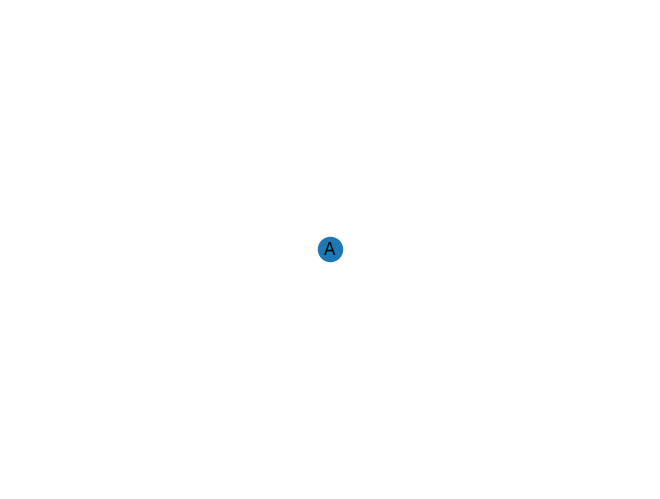

In [6]:
# Añadir un único nodo
# ======================================================================================
G.add_node("A")
nx.draw(G, with_labels=True)
print(G)

In [7]:
import seaborn as sns

Graph with 3 nodes and 0 edges


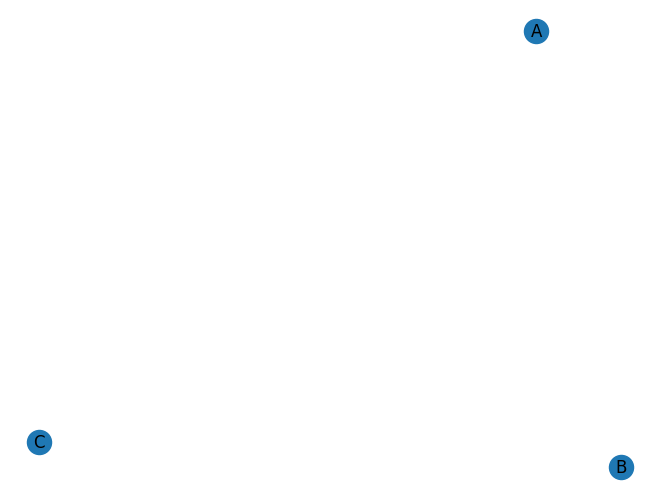

In [8]:
# Añadir multiples nodos 
# ======================================================================================
G.add_nodes_from(["B", "C"])
nx.draw(G, with_labels=True)
print(G)

Graph with 3 nodes and 1 edges


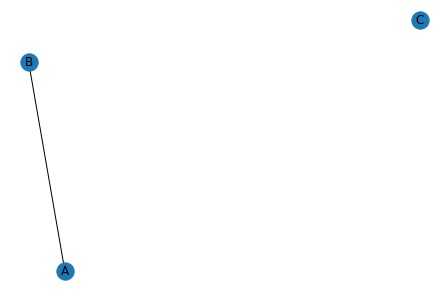

In [36]:
# Añadir un único eje
# ======================================================================================
G.add_edge("A", "B")
nx.draw(G, with_labels=True)
print(G)

Graph with 3 nodes and 2 edges


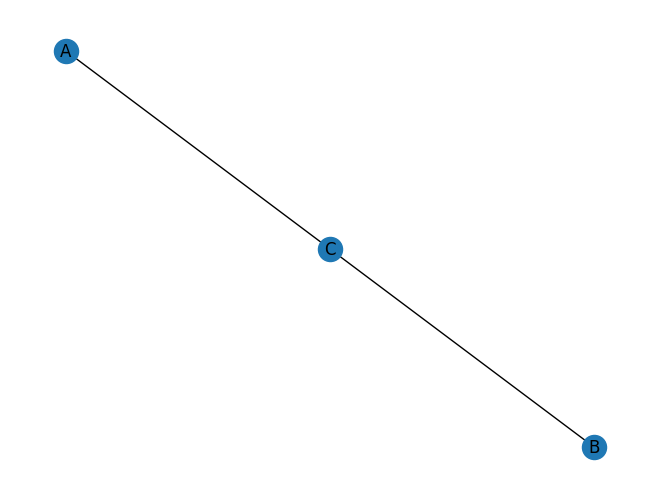

In [9]:
# Añadir múltiples ejes
# ======================================================================================
G.add_edges_from([("A", "C"), ("B", "C")])
nx.draw(G, with_labels=True)
print(G)

Si se añade una conexión cuyos nodos no existen, se crean automáticamente.

Graph with 6 nodes and 4 edges


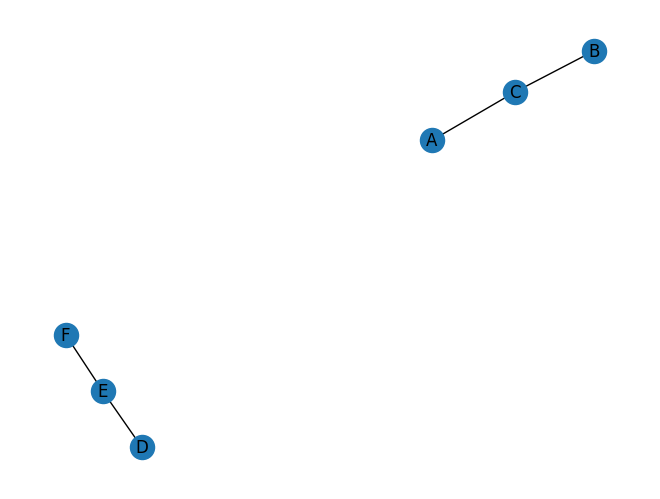

In [10]:
G.add_edges_from([("D", "E"), ("E", "F")])
nx.draw(G, with_labels=True)
print(G)

La información de los nodos y ejes del grafo está almacenada en los attributos `nodes` y `edges`.


In [11]:
print(f"Nodos del grafo: {G.nodes}")
print(f"Ejes del grafo: {G.edges}")

Nodos del grafo: ['A', 'B', 'C', 'D', 'E', 'F']
Ejes del grafo: [('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F')]


#### Creación desde un DataFrame

Para crear un grafo a partir de un dataframe de pandas, la información tiene que estar estructurada de tal forma una columna que represente el incio de cada eje y otra el destino. Por ejemplo, para representar que existen dos nodos ("A" y "B") conectados entre si, se necesita una fila que contenga el valor "A" en una columna y "B" en otra. Esta información es suficiente para que se creen los dos nodos y la conexión entre ambos.

In [12]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame({
                "inicio": ["A", "B", "C"],
                "fin": ["C", "C", "D"],
            })
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D


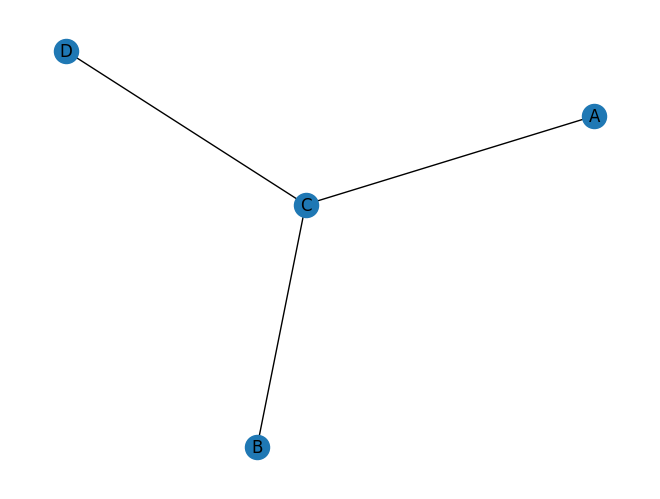

In [13]:
# Crear un grafo a partir de un Dataframe
# ======================================================================================
G = nx.from_pandas_edgelist(
        conexiones,
        source = "inicio",
        target = "fin"
    )
nx.draw(G, with_labels=True)

En el ejemplo anterior, el grafo no es dirigido, es decir, la conexión ("A", "B") es equivalente a ("B", "A"). Tambien es posible crear un grafo dirigido donde la conexión tiene una dirección específica (detalles más adelante). Un ejemplo de este tipo de red podría ser la de envío de mensajes entre personas.

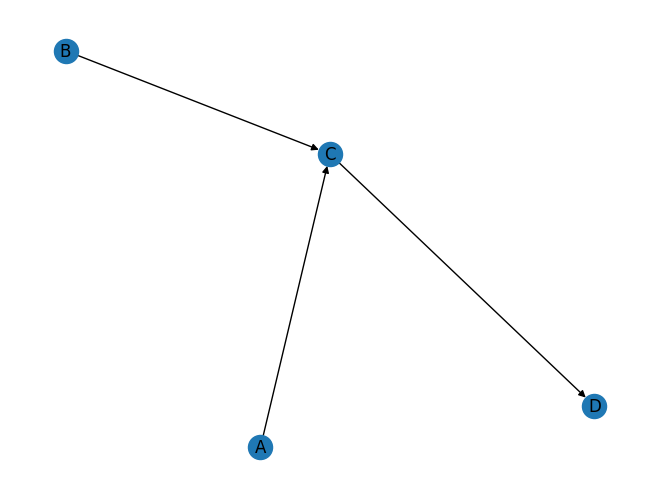

In [14]:
# Crear un grafo dirigido a partir de un Dataframe
# ======================================================================================
G = nx.from_pandas_edgelist(
    conexiones,
    source       = "inicio",
    target       = "fin", 
    create_using = nx.DiGraph
)
nx.draw(G, with_labels=True)

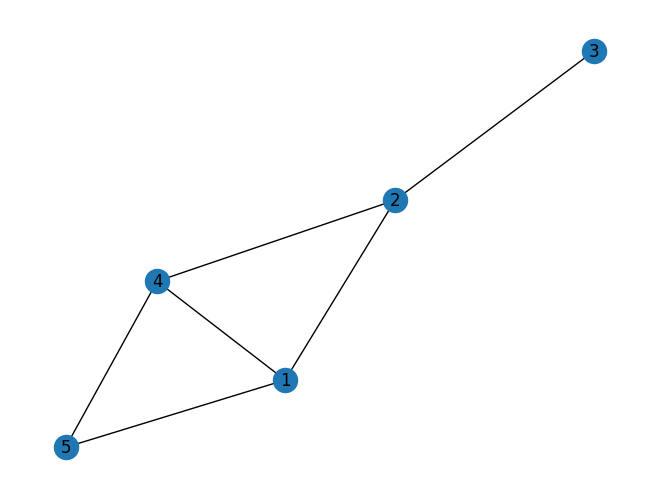

In [15]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])

# Dibujamos la red. Más adelante daremos más detalles sobre representación de grafos.
nx.draw(G, with_labels=True)

In [16]:
# neighbors
nx.to_dict_of_lists(G)

{1: [2, 4, 5], 2: [1, 3, 4], 3: [2], 4: [1, 2, 5], 5: [1, 4]}

In [17]:
adjM = nx.adjacency_matrix(G)

# Pasamos de matriz sparse a dense para poder imprimirla por pantalla
adjM = adjM.todense()
adjM

matrix([[0, 1, 0, 1, 1],
        [1, 0, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1],
        [1, 0, 0, 1, 0]])

    Curiosidad: La matriz de adyacencia y la distancia entre nodos

    La matriz de adyacencia nos da de forma implícita las distancias de orden 1 entre cualquier par de nodos. La distancia de orden 1 es trivial, ya que son directamente las conexiones del grafo.

    Una propiedad interesante de la matriz de adyacencia es que si la multiplicamos por sí misma `n` veces, obtenemos la matriz de distancias de orden `n`. 

    Así, la matriz de distancia de orden 2 nos mostrará todos los pares de nodos que están conectados con un nodo intermedio. En el ejemplo, los nodos `2` y `5` tienen entre medias los nodos `4` y `1`, es decir, existen dos caminos posibles de orden 2 que los conectan: el `2-4-5` y el `2-1-5`. Por ese motivo, el elemento [2,5] de la matriz de distancias de orden 2 es 2.

In [18]:
distancias_orden_dos = adjM*adjM

print(distancias_orden_dos)
# elemento 2,5 en python, se resta uno a los índices
print(f"Caminos de orden dos entre los nodos 2 y 5 = {distancias_orden_dos[1,4]}")

[[3 1 1 2 1]
 [1 3 0 1 2]
 [1 0 1 1 0]
 [2 1 1 3 1]
 [1 2 0 1 2]]
Caminos de orden dos entre los nodos 2 y 5 = 2


### Grafo dirigido

Como se ha explicado anteriormente, los enlaces de los grafos dirigidos tienen una dirección definida. Los enlaces de estos grafos se representan con una flecha. La matriz de adyacencia de los grafos dirigidos no es simétrica.




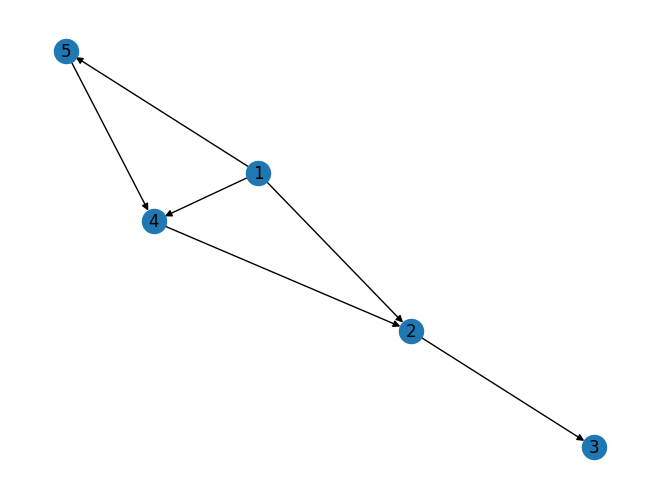

In [19]:
# Creamos una instancia tipo "Grafo dirigido".
G = nx.DiGraph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])

# Dibujamos la red. Más adelante daremos más detalles sobre representación de grafos.
nx.draw(G, with_labels=True)

In [20]:
adjM = nx.adjacency_matrix(G)
adjM.todense()

matrix([[0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0]])

### Grafo ponderado

En un grafo ponderado, los ejes del grafo tienen un peso asociado. Los ejes de estos grafos se suelen representar con una anchura distinta en función del peso. Ejemplo: Red social, donde el peso es el número de interacciones entre dos usuarios.



In [21]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_weighted_edges_from([(1, 2, 0.5), (2,3, 0.9), (1, 4, 0.1), (1, 5, 0.75), (4,2, 0.01), (5,4, 0.3)])

G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

Como podemos ver, ahora los ejes tienen el atributo weight.

En el siguiente apartado explicaremos más detalles de los atributos asociados a nodos y ejes.

### Grafo bipartito

Si los nodos de un grafo representan entidades de distinta naturaleza se denominan grafos bipartitos. Un ejemplo común de grafos bipartitos son las redes de publicaciones donde existen nodos de tipo "artículo" y otros de tipo "escritor". En el grafo existirá un eje cuando un escritor publique un artículo. 

En este tipo de grafos, las conexiones únicamente puden ocurrir entre nodos de distinta naturaleza (no pueden existir conexiones entre artículos entre sí).

En los grafos bipartitos se habla de proyecciones cuando se quiere es que se pueden realizar "proyecciones" (Grafos "E"). Esto es construir un grafo para cada uno de los tipos de nodos en función de sus conexiones comunes. Más adelante veremos un ejemplo completo de estos grafos.


> Un grafo puede tener cualquier combinación de estas características: por ejemplo, podemos tener un grafo simple, dirigido y ponderado

Los grafos bipartitos son unos de los tipos de grafos más utilizados en el Graph Machine Learning. En el siguiente enlace encontrarás un case study con Grafos Bipartitos [proximamente].

# Atributos de nodos y ejes



Supongamos que estamos analizando los datos de una red social, en el que los nodos son usuarios y los ejes representan si dos usuarios son amigos.

1. En este caso puede ser que queramos guardar información relativa a los usuarios, como por ejemplo:

    - Nombre y apellidos.
    - Edad.
    - Profesión.
    - Aficiones.

    Los atributos de los nodos se añaden con el método `networkx.set_node_atributes(Grafo, diccionario, nombre)`


2. Por otro lado, los ejes puede ser que también tengan atributos:

    - Fecha en la que inició la amistad.
    - Intensidad de la amista (weight)

    Los atributos de los ejes se añaden con el método `networkx.set_edge_atributes()`

Los atributos de nodos y ejes son muy importantes en el Graph Machine Learning. De hecho, las Graph Neural Networks utilizan atributos de ejes y nodos para hacer predicciones. 

> Por ejemplo, si queremos predecir futuras amistadas entre usuarios, será interesante tener en cuenta las aficiones de cada usuario: (Será más probable que usuarios con aficiones similares se hagan amigos en un futuro).


In [ ]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])


G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (2, 4, {}), (4, 5, {})])

In [ ]:
# Añadimos atributos de los nodos
node_name = {
    1:"Jaime",
    2:"María",
    3:"Julio",
    4:"Rosa",
    5:"Alberto"
}

node_aficiones = {
    1:["Futbol"],
    2:["Baile", "Pádel"],
    3:["Golf", "Baile"],
    4:["Cocina"],
    5:["Cocina", "Jamón"]
}

nx.set_node_attributes(G, node_name, name="Nombre")
nx.set_node_attributes(G, node_aficiones, name="Aficiones")

# Añadimos atributos de los ejes
edges_weight = {
    (1, 2): 0.5, 
    (2,3): 0.9, 
    (1, 4): 0.1, 
    (1, 5): 0.75, 
    (4,2): 0.01, 
    (5,4): 0.3
}

nx.set_edge_attributes(G, edges_weight, name="weight")



Para acceder a los atributos de nodos y ejes utilizamos `G.nodes(data=True)` o `G.edges(data=True)`. 
Estos comandos nos devuelven una objeto de nodos/ejes con un diccionario asociado con todos los atributos.

En nuestro caso, los nodos no contienen ningún atributo todavía.

In [ ]:
G.nodes(data=True)

NodeDataView({1: {'Nombre': 'Jaime', 'Aficiones': ['Futbol']}, 2: {'Nombre': 'María', 'Aficiones': ['Baile', 'Pádel']}, 3: {'Nombre': 'Julio', 'Aficiones': ['Golf', 'Baile']}, 4: {'Nombre': 'Rosa', 'Aficiones': ['Cocina']}, 5: {'Nombre': 'Alberto', 'Aficiones': ['Cocina', 'Jamón']}})

In [ ]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

> TRUCO: los atributos de ejes y nodos se pueden iterar directamente como si se tratase de un diccionario!

In [ ]:
[print(f"Eje que conecte el nodo {m} con el nodo {n} y tiene un peso de {w['weight']}.") for m, n, w in G.edges(data=True)]

Eje que conecte el nodo 1 con el nodo 2 y tiene un peso de 0.5.
Eje que conecte el nodo 1 con el nodo 4 y tiene un peso de 0.1.
Eje que conecte el nodo 1 con el nodo 5 y tiene un peso de 0.75.
Eje que conecte el nodo 2 con el nodo 3 y tiene un peso de 0.9.
Eje que conecte el nodo 2 con el nodo 4 y tiene un peso de 0.01.
Eje que conecte el nodo 4 con el nodo 5 y tiene un peso de 0.3.


[None, None, None, None, None, None]

> EJERCICIO: qué ejes tienen un peso mayor que 0.5?

In [ ]:
threshold = 0.5
edge_list = [
    (n, m) for n, m, d in G.edges(data=True) if d["weight"] >= threshold
]

edge_list

[(1, 2), (1, 5), (2, 3)]

Y don un subset de ejes, podemos filtrar el grafo:

[(1, 2), (1, 5), (2, 3)]


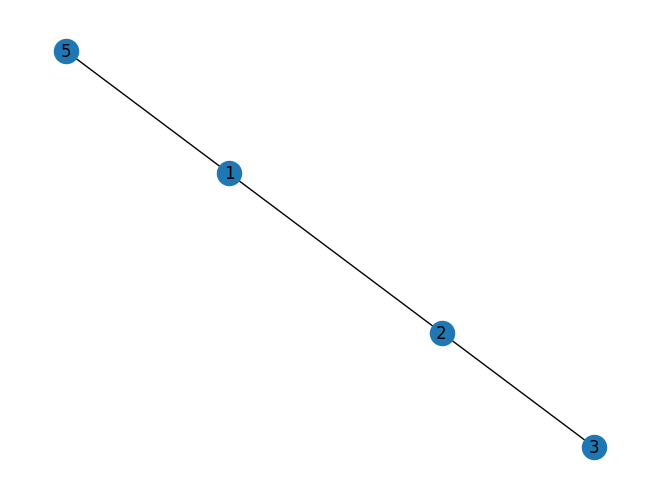

In [ ]:
G_filtrado = G.edge_subgraph(edge_list)
print(G_filtrado.edges)
nx.draw(G_filtrado, with_labels=True)


In [ ]:
conexiones = pd.DataFrame(
    {
        "source": [0, 1, 2],
        "target": [2, 2, 3],
        "weight": [3, 4, 5],
        "color": ["red", "blue", "blue"],
    }
)
conexiones

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


## Información de sesión

In [ ]:
from sinfo import sinfo
sinfo()

## Bibliografía
<br>

Linear Models with R by Julian J.Faraway [libro](https://www.amazon.es/gp/product/1439887330/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=cienciadedato-21&creative=24630&linkCode=as2&creativeASIN=1439887330&linkId=e9ca62e854567fb3f9d0ea044f084b11)


https://towardsdatascience.com/graph-machine-learning-with-python-pt-1-basics-metrics-and-algorithms-cc40972de113

https://towardsdatascience.com/graph-machine-learning-with-python-pt-2-random-graphs-and-diffusion-models-of-cryptopunks-trading-99cd5170b5ea

https://towardsdatascience.com/graph-machine-learning-with-python-part-3-unsupervised-learning-aa2854fe0ff2

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/

http://networksciencebook.com/


**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Graph Machine Learning: Grafos by Fernando Carazo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by Fernando Carazo is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    #font-size: 16px;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    #font-size: 1em;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>